In [0]:
import requests
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
def daily_price_historical(symbol, comparison_symbol, all_data=False, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [0]:
df = daily_price_historical('BTC', 'USD', all_data=True)
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [4]:
print (len(train), len(test))
print (train, test)

(2286, 553)
(           close        high         low        open        time  volumefrom  \
0        0.04951     0.04951     0.04951     0.04951  1279324800       20.00   
1        0.08584     0.08585     0.05941     0.04951  1279411200       75.01   
2        0.08080     0.09307     0.07723     0.08584  1279497600      574.00   
3        0.07474     0.08181     0.07426     0.08080  1279584000      262.00   
4        0.07921     0.07921     0.06634     0.07474  1279670400      575.00   
5        0.05050     0.08181     0.05050     0.07921  1279756800     2160.00   
6        0.06262     0.06767     0.05050     0.05050  1279843200     2402.50   
8        0.05050     0.05941     0.05050     0.05454  1280016000     1551.48   
9        0.05600     0.05600     0.05000     0.05050  1280102400      877.00   
10       0.06000     0.06050     0.05300     0.05600  1280188800     3373.69   
11       0.05890     0.06200     0.05400     0.06000  1280275200     4390.29   
12       0.06990     0.0699

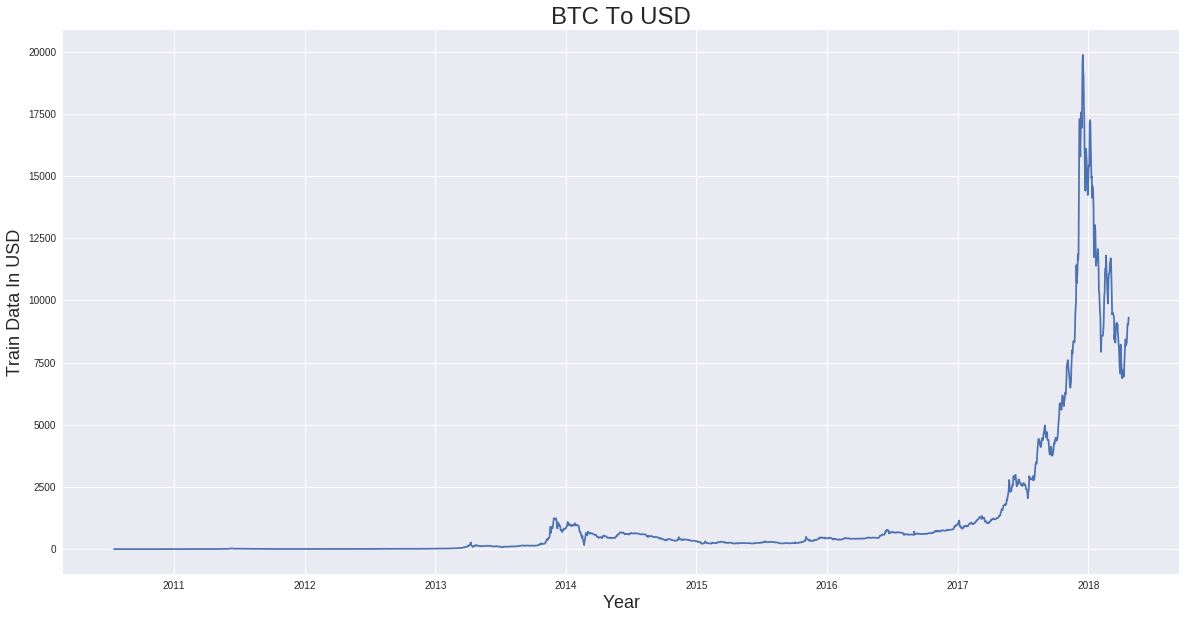

In [5]:
plt.figure(figsize=(20,10))
plt.plot(train.timestamp, train.high)
plt.title('BTC' + ' To ' + 'USD', fontsize=24)
plt.ylabel('Train Data In ' + 'USD', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.show()

In [0]:
np.set_printoptions(suppress=True)
train_X = np.asarray(train.time)
train_Y = np.asarray(train.high)
# np.set_printoptions(suppress=True)
# train_X = np.asarray([float(10000*np.random.random()) for i in xrange(4)]).astype(int)
# train_Y = train_X * 1.5

In [0]:
# Parameters
learning_rate = 0.000000000000001
training_epochs = 1
display_step = 50

In [0]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(0., name="weight")
b = tf.Variable(0., name="bias")

In [0]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(0., name="weight")
b = tf.Variable(0., name="bias")

In [0]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [11]:
n_samples = train_X.shape[0]

print ( train_Y, train_X)
# Mean squared error
powa = (pred-Y) * (pred-Y)
cost = tf.reduce_sum(powa)/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

(array([   0.04951,    0.08585,    0.09307, ..., 9043.98   , 9025.73   ,
       9310.05   ]), array([1279324800, 1279411200, 1279497600, ..., 1524355200, 1524441600,
       1524528000]))


In [0]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [14]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            print '-----------------------------------------'
            print ('pred', sess.run(pred, feed_dict={X: x, Y: y}))
            print ('W', sess.run(W))
            print ('X', sess.run(X, feed_dict={X: x, Y: y}))
            print ('b', sess.run(b))
            print ('y', y)
            print ('powa', sess.run(powa, feed_dict={X: x, Y: y}))
            print '-----------------------------------------'


        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

   

-----------------------------------------
('pred', 0.03544691)
('W', 2.7707512e-11)
('X', array(1.2793248e+09, dtype=float32))
('b', 2.1657918e-20)
('y', 0.04951)
('powa', 0.0001977705)
-----------------------------------------
-----------------------------------------
('pred', 0.07153878)
('W', 5.5915394e-11)
('X', array(1.2794112e+09, dtype=float32))
('b', 4.3705467e-20)
('y', 0.08585)
('powa', 0.00020481093)
-----------------------------------------
-----------------------------------------
('pred', 0.08695969)
('W', 6.796393e-11)
('X', array(1.2794976e+09, dtype=float32))
('b', 5.3122085e-20)
('y', 0.09307)
('powa', 3.7335896e-05)
-----------------------------------------
-----------------------------------------
('pred', 0.08327292)
('W', 6.5078117e-11)
('X', array(1.279584e+09, dtype=float32))
('b', 5.086681e-20)
('y', 0.08181)
('powa', 2.1401393e-06)
-----------------------------------------
-----------------------------------------
('pred', 0.08036408)
('W', 6.2800605e-11)
('X'

('X', array(1.2956544e+09, dtype=float32))
('b', 2.605262e-19)
('y', 0.4443)
('powa', 8.3340594e-05)
-----------------------------------------
-----------------------------------------
('pred', 0.44188344)
('W', 3.4102765e-10)
('X', array(1.2957408e+09, dtype=float32))
('b', 2.6450698e-19)
('y', 0.4443)
('powa', 5.8397195e-06)
-----------------------------------------
-----------------------------------------
('pred', 0.4422707)
('W', 3.4130376e-10)
('X', array(1.2958272e+09, dtype=float32))
('b', 2.6472005e-19)
('y', 0.4424)
('powa', 1.6721664e-08)
-----------------------------------------
-----------------------------------------
('pred', 0.42959076)
('W', 3.3149644e-10)
('X', array(1.2959136e+09, dtype=float32))
('b', 2.5715218e-19)
('y', 0.425)
('powa', 2.1074984e-05)
-----------------------------------------
-----------------------------------------
('pred', 0.42255163)
('W', 3.2604291e-10)
('X', array(1.296e+09, dtype=float32))
('b', 2.529442e-19)
('y', 0.42)
('powa', 6.5108925e-

('powa', 0.036757294)
-----------------------------------------
-----------------------------------------
('pred', 11.500418)
('W', 8.7599e-09)
('X', array(1.312848e+09, dtype=float32))
('b', 6.728436e-18)
('y', 12.1)
('powa', 0.3594994)
-----------------------------------------
-----------------------------------------
('pred', 10.746309)
('W', 8.184417e-09)
('X', array(1.3130208e+09, dtype=float32))
('b', 6.290146e-18)
('y', 10.5)
('powa', 0.06066826)
-----------------------------------------
-----------------------------------------
('pred', 10.032715)
('W', 7.6404385e-09)
('X', array(1.3131072e+09, dtype=float32))
('b', 5.875878e-18)
('y', 9.8)
('powa', 0.05415611)
-----------------------------------------
-----------------------------------------
('pred', 10.196789)
('W', 7.7648785e-09)
('X', array(1.3131936e+09, dtype=float32))
('b', 5.9706397e-18)
('y', 10.25)
('powa', 0.0028314332)
-----------------------------------------
-----------------------------------------
('pred', 10.9


-----------------------------------------
('pred', 4.7256947)
('W', 3.554659e-09)
('X', array(1.3294368e+09, dtype=float32))
('b', 2.7692377e-18)
('y', 4.77)
('powa', 0.0019629619)
-----------------------------------------
-----------------------------------------
('pred', 4.5512476)
('W', 3.423218e-09)
('X', array(1.3295232e+09, dtype=float32))
('b', 2.6703744e-18)
('y', 4.5)
('powa', 0.0026263162)
-----------------------------------------
-----------------------------------------
('pred', 4.488541)
('W', 3.3756145e-09)
('X', array(1.329696e+09, dtype=float32))
('b', 2.634574e-18)
('y', 4.47)
('powa', 0.00034378114)
-----------------------------------------
-----------------------------------------
('pred', 4.420117)
('W', 3.32394e-09)
('X', array(1.3297824e+09, dtype=float32))
('b', 2.5957147e-18)
('y', 4.4)
('powa', 0.00040468588)
-----------------------------------------
-----------------------------------------
('pred', 4.512929)
('W', 3.3935144e-09)
('X', array(1.3298688e+09, dt

-----------------------------------------
-----------------------------------------
('pred', 12.214373)
('W', 9.081977e-09)
('X', array(1.3449024e+09, dtype=float32))
('b', 6.8881733e-18)
('y', 12.34)
('powa', 0.015782272)
-----------------------------------------
-----------------------------------------
('pred', 13.034065)
('W', 9.690836e-09)
('X', array(1.3449888e+09, dtype=float32))
('b', 7.340861e-18)
('y', 13.25)
('powa', 0.04662782)
-----------------------------------------
-----------------------------------------
('pred', 13.672088)
('W', 1.0164553e-08)
('X', array(1.3450752e+09, dtype=float32))
('b', 7.693047e-18)
('y', 13.84)
('powa', 0.028194603)
-----------------------------------------
-----------------------------------------
('pred', 15.039982)
('W', 1.1180799e-08)
('X', array(1.3451616e+09, dtype=float32))
('b', 8.44853e-18)
('y', 15.4)
('powa', 0.1296128)
-----------------------------------------
-----------------------------------------
('pred', 13.346085)
('W', 9.92

-----------------------------------------
-----------------------------------------
('pred', 19.591017)
('W', 1.4411331e-08)
('X', array(1.3594176e+09, dtype=float32))
('b', 1.08107105e-17)
('y', 19.8)
('powa', 0.04367367)
-----------------------------------------
-----------------------------------------
('pred', 19.76022)
('W', 1.4534874e-08)
('X', array(1.359504e+09, dtype=float32))
('b', 1.0901584e-17)
('y', 19.8)
('powa', 0.0015824216)
-----------------------------------------
-----------------------------------------
('pred', 21.110664)
('W', 1.5527224e-08)
('X', array(1.3595904e+09, dtype=float32))
('b', 1.1631472e-17)
('y', 21.43)
('powa', 0.10197544)
-----------------------------------------
-----------------------------------------
('pred', 20.61726)
('W', 1.516239e-08)
('X', array(1.3597632e+09, dtype=float32))
('b', 1.1363166e-17)
('y', 20.5)
('powa', 0.013749903)
-----------------------------------------
-----------------------------------------
('pred', 20.846224)
('W', 1

('y', 101.94)
('powa', 0.26402342)
-----------------------------------------
-----------------------------------------
('pred', 100.85241)
('W', 7.340418e-08)
('X', array(1.3739328e+09, dtype=float32))
('b', 5.4160478e-17)
('y', 100.73)
('powa', 0.01498323)
-----------------------------------------
-----------------------------------------
('pred', 100.14954)
('W', 7.288802e-08)
('X', array(1.3740192e+09, dtype=float32))
('b', 5.378482e-17)
('y', 100.0)
('powa', 0.022363337)
-----------------------------------------
-----------------------------------------
('pred', 96.06305)
('W', 6.990511e-08)
('X', array(1.374192e+09, dtype=float32))
('b', 5.1614154e-17)
('y', 95.2)
('powa', 0.7448594)
-----------------------------------------
-----------------------------------------
('pred', 93.61609)
('W', 6.812018e-08)
('X', array(1.3742784e+09, dtype=float32))
('b', 5.0315342e-17)
('y', 93.1)
('powa', 0.2663493)
-----------------------------------------
-----------------------------------------


('X', array(1.3902624e+09, dtype=float32))
('b', 5.057103e-16)
('y', 974.25)
('powa', 10.509405)
-----------------------------------------
-----------------------------------------
('pred', 973.49664)
('W', 7.001816e-07)
('X', array(1.3903488e+09, dtype=float32))
('b', 5.0696637e-16)
('y', 973.94)
('powa', 0.19656754)
-----------------------------------------
-----------------------------------------
('pred', 960.451)
('W', 6.9075566e-07)
('X', array(1.3904352e+09, dtype=float32))
('b', 5.0018725e-16)
('y', 958.06)
('powa', 5.716839)
-----------------------------------------
-----------------------------------------
('pred', 951.21454)
('W', 6.840703e-07)
('X', array(1.3905216e+09, dtype=float32))
('b', 4.9537944e-16)
('y', 949.52)
('powa', 2.8713949)
-----------------------------------------
-----------------------------------------
('pred', 974.229)
('W', 7.0057774e-07)
('X', array(1.390608e+09, dtype=float32))
('b', 5.0725013e-16)
('y', 978.41)
('powa', 17.480503)
-----------------

-----------------------------------------
('pred', 626.2511)
('W', 4.4544473e-07)
('X', array(1.4059008e+09, dtype=float32))
('b', 3.2357574e-16)
('y', 625.93)
('powa', 0.10310903)
-----------------------------------------
-----------------------------------------
('pred', 628.46906)
('W', 4.4699487e-07)
('X', array(1.4059872e+09, dtype=float32))
('b', 3.2467826e-16)
('y', 628.81)
('powa', 0.11624171)
-----------------------------------------
-----------------------------------------
('pred', 625.46545)
('W', 4.4483122e-07)
('X', array(1.4060736e+09, dtype=float32))
('b', 3.2313947e-16)
('y', 624.99)
('powa', 0.22606589)
-----------------------------------------
-----------------------------------------
('pred', 622.43866)
('W', 4.4265136e-07)
('X', array(1.40616e+09, dtype=float32))
('b', 3.2158924e-16)
('y', 621.96)
('powa', 0.22909404)
-----------------------------------------
-----------------------------------------
('pred', 610.8705)
('W', 4.343979e-07)
('X', array(1.4062464e+09,

-----------------------------------------
('pred', 231.74968)
('W', 1.6305702e-07)
('X', array(1.42128e+09, dtype=float32))
('b', 1.2377327e-16)
('y', 231.26)
('powa', 0.23979145)
-----------------------------------------
-----------------------------------------
('pred', 223.69168)
('W', 1.5737791e-07)
('X', array(1.4213664e+09, dtype=float32))
('b', 1.1977775e-16)
('y', 222.63)
('powa', 1.127156)
-----------------------------------------
-----------------------------------------
('pred', 213.88081)
('W', 1.5046635e-07)
('X', array(1.4214528e+09, dtype=float32))
('b', 1.1491542e-16)
('y', 212.59)
('powa', 1.6662092)
-----------------------------------------
-----------------------------------------
('pred', 227.5397)
('W', 1.6003655e-07)
('X', array(1.4217984e+09, dtype=float32))
('b', 1.2164648e-16)
('y', 229.32)
('powa', 3.1694822)
-----------------------------------------
-----------------------------------------
('pred', 237.4823)
('W', 1.6701937e-07)
('X', array(1.4218848e+09, dt

('powa', 1.9098079)
-----------------------------------------
-----------------------------------------
('pred', 293.44656)
('W', 2.0421936e-07)
('X', array(1.4369184e+09, dtype=float32))
('b', 1.5250481e-16)
('y', 292.92)
('powa', 0.2772552)
-----------------------------------------
-----------------------------------------
('pred', 291.09372)
('W', 2.0256975e-07)
('X', array(1.4370048e+09, dtype=float32))
('b', 1.5135687e-16)
('y', 290.84)
('powa', 0.06437543)
-----------------------------------------
-----------------------------------------
('pred', 281.75967)
('W', 1.9606249e-07)
('X', array(1.4370912e+09, dtype=float32))
('b', 1.468288e-16)
('y', 280.76)
('powa', 0.99932873)
-----------------------------------------
-----------------------------------------
('pred', 279.13495)
('W', 1.9420105e-07)
('X', array(1.4373504e+09, dtype=float32))
('b', 1.4553375e-16)
('y', 278.85)
('powa', 0.0811923)
-----------------------------------------
-----------------------------------------
('p

('powa', 0.011962891)
-----------------------------------------
-----------------------------------------
('pred', 437.58276)
('W', 3.0144724e-07)
('X', array(1.4516064e+09, dtype=float32))
('b', 2.1954934e-16)
('y', 437.95)
('powa', 0.13487148)
-----------------------------------------
-----------------------------------------
('pred', 437.44397)
('W', 3.013337e-07)
('X', array(1.4516928e+09, dtype=float32))
('b', 2.1947112e-16)
('y', 437.43)
('powa', 0.00019535795)
-----------------------------------------
-----------------------------------------
('pred', 435.42673)
('W', 2.998906e-07)
('X', array(1.451952e+09, dtype=float32))
('b', 2.1847722e-16)
('y', 435.25)
('powa', 0.031232536)
-----------------------------------------
-----------------------------------------
('pred', 432.36966)
('W', 2.9776737e-07)
('X', array(1.4520384e+09, dtype=float32))
('b', 2.1701499e-16)
('y', 432.11)
('powa', 0.06743062)
-----------------------------------------
---------------------------------------


-----------------------------------------
-----------------------------------------
('pred', 632.5981)
('W', 4.313247e-07)
('X', array(1.46664e+09, dtype=float32))
('b', 3.0818992e-16)
('y', 629.55)
('powa', 9.290888)
-----------------------------------------
-----------------------------------------
('pred', 684.1633)
('W', 4.6645602e-07)
('X', array(1.4667264e+09, dtype=float32))
('b', 3.321421e-16)
('y', 687.39)
('powa', 10.411493)
-----------------------------------------
-----------------------------------------
('pred', 687.8708)
('W', 4.6895607e-07)
('X', array(1.4668128e+09, dtype=float32))
('b', 3.3384652e-16)
('y', 688.1)
('powa', 0.052526686)
-----------------------------------------
-----------------------------------------
('pred', 666.5239)
('W', 4.5437608e-07)
('X', array(1.4668992e+09, dtype=float32))
('b', 3.239072e-16)
('y', 665.19)
('powa', 1.7793515)
-----------------------------------------
-----------------------------------------
('pred', 651.29065)
('W', 4.4396

('X', array(1.4816736e+09, dtype=float32))
('b', 3.7276769e-16)
('y', 780.77)
('powa', 0.02454776)
-----------------------------------------
-----------------------------------------
('pred', 791.1446)
('W', 5.3386e-07)
('X', array(1.4819328e+09, dtype=float32))
('b', 3.775009e-16)
('y', 791.57)
('powa', 0.18097796)
-----------------------------------------
-----------------------------------------
('pred', 791.25726)
('W', 5.339049e-07)
('X', array(1.4820192e+09, dtype=float32))
('b', 3.7753121e-16)
('y', 791.26)
('powa', 7.543713e-06)
-----------------------------------------
-----------------------------------------
('pred', 793.63513)
('W', 5.3547814e-07)
('X', array(1.4821056e+09, dtype=float32))
('b', 3.785927e-16)
('y', 793.73)
('powa', 0.008996263)
-----------------------------------------
-----------------------------------------
('pred', 799.77295)
('W', 5.39588e-07)
('X', array(1.482192e+09, dtype=float32))
('b', 3.813655e-16)
('y', 800.02)
('powa', 0.06104374)
-------------


('powa', 0.017124176)
-----------------------------------------
-----------------------------------------
('pred', 2758.1802)
('W', 1.8411316e-06)
('X', array(1.4980896e+09, dtype=float32))
('b', 1.2530833e-15)
('y', 2757.32)
('powa', 0.7397848)
-----------------------------------------
-----------------------------------------
('pred', 2662.4153)
('W', 1.7768996e-06)
('X', array(1.4983488e+09, dtype=float32))
('b', 1.2102147e-15)
('y', 2660.66)
('powa', 3.0813277)
-----------------------------------------
-----------------------------------------
('pred', 2586.1353)
('W', 1.7258906e-06)
('X', array(1.4984352e+09, dtype=float32))
('b', 1.1761732e-15)
('y', 2584.75)
('powa', 1.9189284)
-----------------------------------------
-----------------------------------------
('pred', 2585.0818)
('W', 1.7250882e-06)
('X', array(1.4985216e+09, dtype=float32))
('b', 1.1756377e-15)
('y', 2585.06)
('powa', 0.0004721284)
-----------------------------------------
------------------------------------

('y', 15823.72)
('powa', 14.5202675)
-----------------------------------------
-----------------------------------------
('pred', 14409.766)
('W', 9.517216e-06)
('X', array(1.5140736e+09, dtype=float32))
('b', 6.3383852e-15)
('y', 14413.72)
('powa', 15.634919)
-----------------------------------------
-----------------------------------------
('pred', 16099.782)
('W', 1.0632208e-05)
('X', array(1.5142464e+09, dtype=float32))
('b', 7.0747194e-15)
('y', 16094.67)
('powa', 26.135658)
-----------------------------------------
-----------------------------------------
('pred', 15503.563)
('W', 1.02373e-05)
('X', array(1.5144192e+09, dtype=float32))
('b', 6.813954e-15)
('y', 15505.51)
('powa', 3.788041)
-----------------------------------------
-----------------------------------------
('pred', 15108.477)
('W', 9.975847e-06)
('X', array(1.5145056e+09, dtype=float32))
('b', 6.6413215e-15)
('y', 15109.81)
('powa', 1.7769098)
-----------------------------------------
---------------------------

RuntimeError: ignored

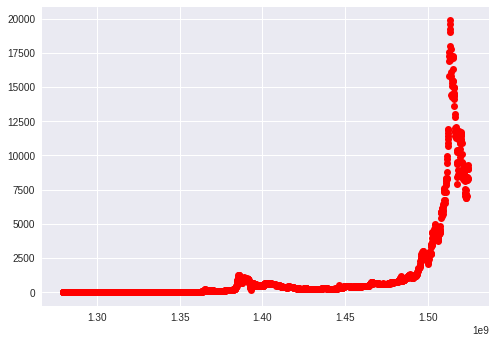

In [15]:
 #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()